In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/fraud-detection/fraudTest.csv
/kaggle/input/fraud-detection/fraudTrain.csv


In [2]:
#import libraries and algrothims we wil use
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier as DTC, DecisionTreeRegressor as DTR
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import accuracy_score

In [3]:
df=pd.read_csv('/kaggle/input/fraud-detection/fraudTrain.csv')
df.head()

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,0,2019-01-01 00:00:18,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.97,Jennifer,Banks,F,561 Perry Cove,...,36.0788,-81.1781,3495,"Psychologist, counselling",1988-03-09,0b242abb623afc578575680df30655b9,1325376018,36.011293,-82.048315,0
1,1,2019-01-01 00:00:44,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,Stephanie,Gill,F,43039 Riley Greens Suite 393,...,48.8878,-118.2105,149,Special educational needs teacher,1978-06-21,1f76529f8574734946361c461b024d99,1325376044,49.159047,-118.186462,0
2,2,2019-01-01 00:00:51,38859492057661,fraud_Lind-Buckridge,entertainment,220.11,Edward,Sanchez,M,594 White Dale Suite 530,...,42.1808,-112.2620,4154,Nature conservation officer,1962-01-19,a1a22d70485983eac12b5b88dad1cf95,1325376051,43.150704,-112.154481,0
3,3,2019-01-01 00:01:16,3534093764340240,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,Jeremy,White,M,9443 Cynthia Court Apt. 038,...,46.2306,-112.1138,1939,Patent attorney,1967-01-12,6b849c168bdad6f867558c3793159a81,1325376076,47.034331,-112.561071,0
4,4,2019-01-01 00:03:06,375534208663984,fraud_Keeling-Crist,misc_pos,41.96,Tyler,Garcia,M,408 Bradley Rest,...,38.4207,-79.4629,99,Dance movement psychotherapist,1986-03-28,a41d7549acf90789359a9aa5346dcb46,1325376186,38.674999,-78.632459,0


In [4]:
df.shape

(1296675, 23)

In [5]:
df.columns

Index(['Unnamed: 0', 'trans_date_trans_time', 'cc_num', 'merchant', 'category',
       'amt', 'first', 'last', 'gender', 'street', 'city', 'state', 'zip',
       'lat', 'long', 'city_pop', 'job', 'dob', 'trans_num', 'unix_time',
       'merch_lat', 'merch_long', 'is_fraud'],
      dtype='object')

In [6]:
df.drop(columns='Unnamed: 0',axis=1,inplace=True)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1296675 entries, 0 to 1296674
Data columns (total 22 columns):
 #   Column                 Non-Null Count    Dtype  
---  ------                 --------------    -----  
 0   trans_date_trans_time  1296675 non-null  object 
 1   cc_num                 1296675 non-null  int64  
 2   merchant               1296675 non-null  object 
 3   category               1296675 non-null  object 
 4   amt                    1296675 non-null  float64
 5   first                  1296675 non-null  object 
 6   last                   1296675 non-null  object 
 7   gender                 1296675 non-null  object 
 8   street                 1296675 non-null  object 
 9   city                   1296675 non-null  object 
 10  state                  1296675 non-null  object 
 11  zip                    1296675 non-null  int64  
 12  lat                    1296675 non-null  float64
 13  long                   1296675 non-null  float64
 14  city_pop          

In [8]:
df.isnull().sum()

trans_date_trans_time    0
cc_num                   0
merchant                 0
category                 0
amt                      0
first                    0
last                     0
gender                   0
street                   0
city                     0
state                    0
zip                      0
lat                      0
long                     0
city_pop                 0
job                      0
dob                      0
trans_num                0
unix_time                0
merch_lat                0
merch_long               0
is_fraud                 0
dtype: int64

In [9]:
df.drop_duplicates(inplace=True)

In [10]:
df.shape

(1296675, 22)

In [11]:
df['lat_dis']=df['lat']-df['merch_lat']
df['long_dis']=df['long']-df['merch_long']

In [12]:
df.drop(columns=['lat','long','merch_lat','merch_long'],axis=1,inplace=True)

In [13]:
df.shape

(1296675, 20)

In [14]:
df.isnull().sum()

trans_date_trans_time    0
cc_num                   0
merchant                 0
category                 0
amt                      0
first                    0
last                     0
gender                   0
street                   0
city                     0
state                    0
zip                      0
city_pop                 0
job                      0
dob                      0
trans_num                0
unix_time                0
is_fraud                 0
lat_dis                  0
long_dis                 0
dtype: int64

<Axes: xlabel='gender', ylabel='is_fraud'>

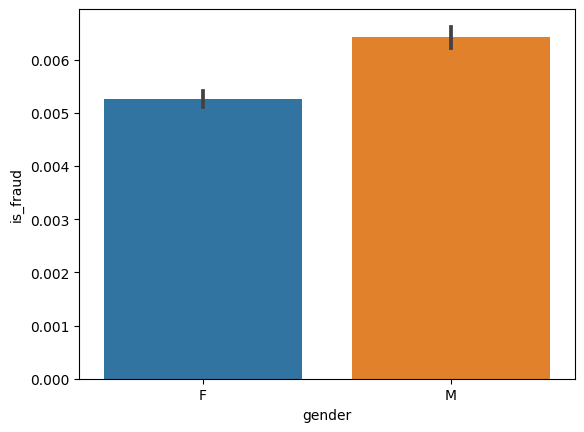

In [15]:
sns.barplot(x=df['gender'],y=df['is_fraud'])

as we see male is more than female

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13]),
 [Text(0, 0, 'misc_net'),
  Text(1, 0, 'grocery_pos'),
  Text(2, 0, 'entertainment'),
  Text(3, 0, 'gas_transport'),
  Text(4, 0, 'misc_pos'),
  Text(5, 0, 'grocery_net'),
  Text(6, 0, 'shopping_net'),
  Text(7, 0, 'shopping_pos'),
  Text(8, 0, 'food_dining'),
  Text(9, 0, 'personal_care'),
  Text(10, 0, 'health_fitness'),
  Text(11, 0, 'travel'),
  Text(12, 0, 'kids_pets'),
  Text(13, 0, 'home')])

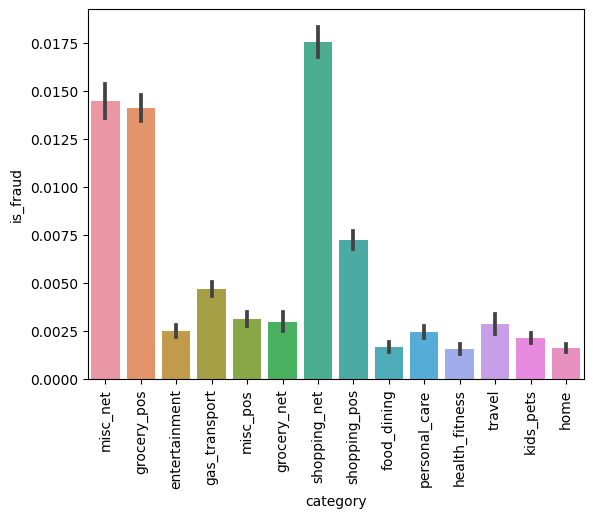

In [16]:
sns.barplot(x=df['category'],y=df['is_fraud'])
plt.xticks(rotation=90)

/tmp/ipykernel_32/2391342688.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['amt'],kde=True)


<Axes: xlabel='amt', ylabel='Density'>

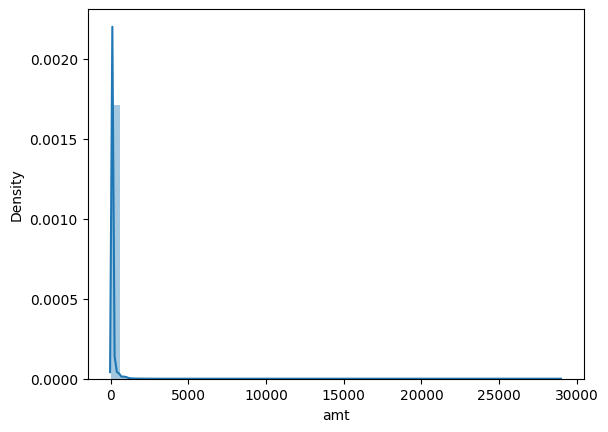

In [17]:
sns.distplot(df['amt'],kde=True)

In [18]:
df['trans_date_trans_time']=pd.to_datetime(df['trans_date_trans_time'])
df['trans_date_trans_time']=df['trans_date_trans_time'].dt.strftime('%Y-%m-%d')
df['trans_date_trans_time']=pd.to_datetime(df['trans_date_trans_time'])
df['dob']=pd.to_datetime(df['dob'])
df['age']=df['dob'].dt.year
#df["age"] = (df["trans_date_trans_time"] - df["dob"]).dt.days //365
df['trans_month']=df['trans_date_trans_time'].dt.month
df['trans_year']=df['trans_date_trans_time'].dt.year

In [19]:
df['age'].value_counts()

age
1972    45483
1984    40038
1987    37481
1985    37313
1974    34299
        ...  
1933     3041
1932     2096
2005     1959
1924      536
1925       11
Name: count, Length: 81, dtype: int64

In [20]:
c=df.groupby(['age'])['is_fraud'].sum()
c=pd.DataFrame(c)
c.describe()

,is_fraud
count,81.000000
mean,92.666667
std,51.201807
min,0.000000
25%,47.000000
50%,90.000000
75%,131.000000
max,195.000000


In [21]:
df.columns

Index(['trans_date_trans_time', 'cc_num', 'merchant', 'category', 'amt',
       'first', 'last', 'gender', 'street', 'city', 'state', 'zip', 'city_pop',
       'job', 'dob', 'trans_num', 'unix_time', 'is_fraud', 'lat_dis',
       'long_dis', 'age', 'trans_month', 'trans_year'],
      dtype='object')

In [22]:
df.drop(columns=['trans_num', 'merchant','first', 'last', 'street','unix_time'],axis=1,inplace=True)

In [23]:
df.drop(columns=['dob'],axis=1,inplace=True)

In [24]:
df.columns

Index(['trans_date_trans_time', 'cc_num', 'category', 'amt', 'gender', 'city',
       'state', 'zip', 'city_pop', 'job', 'is_fraud', 'lat_dis', 'long_dis',
       'age', 'trans_month', 'trans_year'],
      dtype='object')

In [25]:
df['age'].value_counts().sort_values(ascending=False)

age
1972    45483
1984    40038
1987    37481
1985    37313
1974    34299
        ...  
1933     3041
1932     2096
2005     1959
1924      536
1925       11
Name: count, Length: 81, dtype: int64

In [26]:
df['age2']=df['trans_year']-df['age']
df.drop(columns=['age'],axis=1)

,trans_date_trans_time,cc_num,category,amt,gender,city,state,zip,city_pop,job,is_fraud,lat_dis,long_dis,trans_month,trans_year,age2
0,2019-01-01,2703186189652095,misc_net,4.97,F,Moravian Falls,NC,28654,3495,"Psychologist, counselling",0,0.067507,0.870215,1,2019,31
1,2019-01-01,630423337322,grocery_pos,107.23,F,Orient,WA,99160,149,Special educational needs teacher,0,-0.271247,-0.024038,1,2019,41
2,2019-01-01,38859492057661,entertainment,220.11,M,Malad City,ID,83252,4154,Nature conservation officer,0,-0.969904,-0.107519,1,2019,57
3,2019-01-01,3534093764340240,gas_transport,45.00,M,Boulder,MT,59632,1939,Patent attorney,0,-0.803731,0.447271,1,2019,52
4,2019-01-01,375534208663984,misc_pos,41.96,M,Doe Hill,VA,24433,99,Dance movement psychotherapist,0,-0.254299,-0.830441,1,2019,33
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1296670,2020-06-21,30263540414123,entertainment,15.56,M,Hatch,UT,84735,258,Geoscientist,0,0.876234,-0.786935,6,2020,59
1296671,2020-06-21,6011149206456997,food_dining,51.70,M,Tuscarora,MD,21790,100,"Production assistant, television",0,0.359819,0.736428,6,2020,41
1296672,2020-06-21,3514865930894695,food_dining,105.93,M,High Rolls Mountain Park,NM,88325,899,Naval architect,0,-0.679913,-0.688371,6,2020,53
1296673,2020-06-21,2720012583106919,food_dining,74.90,M,Manderson,SD,57756,1126,Volunteer coordinator,0,0.563660,0.700060,6,2020,40


In [27]:
df.head()

,trans_date_trans_time,cc_num,category,amt,gender,city,state,zip,city_pop,job,is_fraud,lat_dis,long_dis,age,trans_month,trans_year,age2
0,2019-01-01,2703186189652095,misc_net,4.97,F,Moravian Falls,NC,28654,3495,"Psychologist, counselling",0,0.067507,0.870215,1988,1,2019,31
1,2019-01-01,630423337322,grocery_pos,107.23,F,Orient,WA,99160,149,Special educational needs teacher,0,-0.271247,-0.024038,1978,1,2019,41
2,2019-01-01,38859492057661,entertainment,220.11,M,Malad City,ID,83252,4154,Nature conservation officer,0,-0.969904,-0.107519,1962,1,2019,57
3,2019-01-01,3534093764340240,gas_transport,45.00,M,Boulder,MT,59632,1939,Patent attorney,0,-0.803731,0.447271,1967,1,2019,52
4,2019-01-01,375534208663984,misc_pos,41.96,M,Doe Hill,VA,24433,99,Dance movement psychotherapist,0,-0.254299,-0.830441,1986,1,2019,33


/tmp/ipykernel_32/381972344.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['age2'])


<Axes: xlabel='age2', ylabel='Density'>

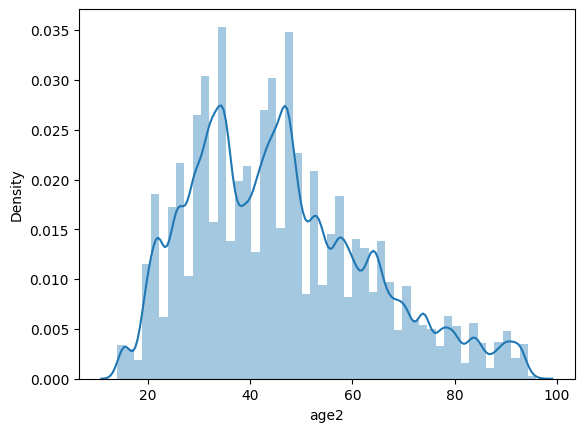

In [28]:
sns.distplot(df['age2'])

In [29]:
c2=df.groupby(['age2'])['is_fraud'].sum()
c2=pd.DataFrame(c2)
c2

,is_fraud
age2,
14,7
15,16
16,37
17,0
18,58
...,...
92,70
93,16
94,27


In [30]:
c2.describe()

,is_fraud
count,83.000000
mean,90.433735
std,53.008787
min,0.000000
25%,41.000000
50%,89.000000
75%,126.000000
max,201.000000


In [31]:
df.columns

Index(['trans_date_trans_time', 'cc_num', 'category', 'amt', 'gender', 'city',
       'state', 'zip', 'city_pop', 'job', 'is_fraud', 'lat_dis', 'long_dis',
       'age', 'trans_month', 'trans_year', 'age2'],
      dtype='object')

In [32]:
from sklearn.preprocessing import LabelEncoder
# Encode categorical features using scikit-learn LabelEncoder
encoder = LabelEncoder()
df['trans_date_trans_time'] = encoder.fit_transform(df['trans_date_trans_time'])
df['category'] = encoder.fit_transform(df['category'])
df['gender'] = encoder.fit_transform(df['gender'])
df['cc_num'] = encoder.fit_transform(df['cc_num'])
df['job'] = encoder.fit_transform(df['job'])
df['city'] = encoder.fit_transform(df['city'])
df['state'] = encoder.fit_transform(df['state'])

In [33]:
df.corr()['is_fraud']

trans_date_trans_time   -0.005080
cc_num                   0.000392
category                 0.020205
amt                      0.219404
gender                   0.007642
city                    -0.002092
state                    0.001730
zip                     -0.002162
city_pop                 0.002136
job                     -0.000093
is_fraud                 1.000000
lat_dis                  0.001245
long_dis                -0.000048
age                     -0.012378
trans_month             -0.012409
trans_year               0.003004
age2                     0.012453
Name: is_fraud, dtype: float64

In [34]:
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df[['age2', 'trans_year', 'amt']])

In [35]:
sdf = pd.DataFrame(scaled_data, columns = ['age2', 'trans_year', 'amt'])
sdf
bf = df
bf.loc[:, ['age2', 'trans_year', 'amt']] = sdf[['age2', 'trans_year', 'amt']]

In [36]:
X = bf.drop(columns=['is_fraud'])
y = bf['is_fraud']
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [37]:
from imblearn.over_sampling import SMOTE 
sm = SMOTE() 
X_train_resample,y_train_resample= sm.fit_resample(X_train, y_train) 

In [38]:
print(X_train_resample.shape,y_train_resample.shape)

(2062708, 16) (2062708,)


In [39]:
logistic_model1 = LogisticRegression()
logistic_model1.fit(X_train, y_train)
y_pred = logistic_model1.predict(X_test)
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test, y_pred)
train=logistic_model1.score(X_train, y_train)
print(train)
print(f'Accuracy: {accuracy:.5f}')

0.9942294715329593
Accuracy: 0.99414


In [40]:
logistic_model2 = LogisticRegression(C=100)
logistic_model2.fit(X_train, y_train)
y_pred = logistic_model2.predict(X_test)
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.5f}')

Accuracy: 0.99414


In [41]:
logistic_model2 = LogisticRegression(C=0.001)
logistic_model2.fit(X_train, y_train)
y_pred = logistic_model2.predict(X_test)
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.5f}')

Accuracy: 0.99414


<Axes: xlabel='amt', ylabel='Density'>

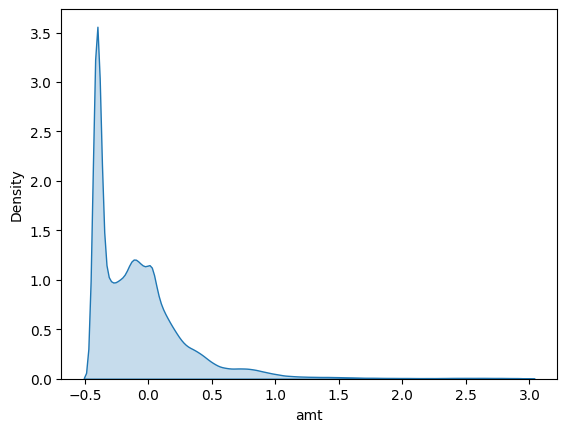

In [44]:
p99 = df["amt"].quantile(0.99)
sns.kdeplot(x="amt", data=df[df["amt"] <= p99], fill=True)

In [46]:
df_num = df.select_dtypes(include='number')

df_num.columns

Index(['trans_date_trans_time', 'cc_num', 'category', 'amt', 'gender', 'city',
       'state', 'zip', 'city_pop', 'job', 'is_fraud', 'lat_dis', 'long_dis',
       'age', 'trans_month', 'trans_year', 'age2'],
      dtype='object')

In [48]:
X = df_num.drop(['is_fraud'],axis=1)
y = df_num.is_fraud

In [49]:
scaler = StandardScaler()
X = scaler.fit_transform(X)

In [51]:
from sklearn.model_selection import StratifiedKFold
skf = StratifiedKFold(n_splits=2)
skf.get_n_splits(X,y)

for train_index, test_index in skf.split(X,y):
  X_train, X_test = X[train_index], X[test_index]
  y_train, y_test = y[train_index], y[test_index]

y_train.value_counts()

is_fraud
0    644585
1      3753
Name: count, dtype: int64

In [52]:
lr = LogisticRegression(random_state=42)
model = lr.fit(X_train, y_train)
y_train_pred = model.predict(X_train)
print('y_train_pred: ',y_train_pred)
y_test_pred = model.predict(X_test)
print('y_test_pred: ', y_test_pred)
train_score = model.score(X_train,y_train)
test_score = model.score(X_test,y_test)
print(train_score)
print(test_score)

y_train_pred:  [0 0 0 ... 0 0 0]
y_test_pred:  [0 0 0 ... 0 0 0]
0.9936807652798386
0.9924884743582427


In [53]:
rus = RandomUnderSampler()
X_rus, y_rus = rus.fit_resample(X_train,y_train)

y_rus.value_counts()

is_fraud
0    3753
1    3753
Name: count, dtype: int64

In [55]:
X_train, X_test, y_train, y_test = train_test_split(X_rus, y_rus, test_size=0.3, random_state=42, stratify=y_rus)

In [57]:
test_input = X_test.copy()
test_output = y_test.copy()
lr = LogisticRegression(random_state=42)
model = lr.fit(X_train, y_train)
y_train_pred = model.predict(X_train)
y_train_pred
test_pred=model.predict(test_input)
test_pred

array([0, 0, 0, ..., 0, 0, 1])

In [62]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedKFold
from sklearn.preprocessing import StandardScaler
import scipy.stats as stats
from imblearn.over_sampling import RandomOverSampler 
ros = RandomOverSampler()
X_ros, y_ros = ros.fit_resample(X_train,y_train)

y_ros.value_counts()

is_fraud
0    2627
1    2627
Name: count, dtype: int64

In [68]:
lr = LogisticRegression(random_state=42)
model = lr.fit(X_train, y_train)
y_train_pred = model.predict(X_train)
y_train_pred
test_pred = model.predict(test_input)
test_pred

array([0, 0, 0, ..., 0, 0, 1])

In [69]:
from sklearn.metrics import classification_report
print(classification_report(test_output, test_pred))

              precision    recall  f1-score   support

           0       0.79      0.95      0.86      1126
           1       0.94      0.74      0.83      1126

    accuracy                           0.85      2252
   macro avg       0.86      0.85      0.84      2252
weighted avg       0.86      0.85      0.84      2252

